In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [2]:
def get_latest_csv_data(folder_path):
    # List all files in the given folder
    files = os.listdir(folder_path)
    
    # Filter out only CSV files
    csv_files = [file for file in files if file.endswith('.csv')]
    
    # Sort files in descending order (alphanumeric)
    csv_files.sort(reverse=True)
    
    # Get the first file in the sorted list
    latest_file = csv_files[0]
    
    # Construct the full file path
    file_path = os.path.join(folder_path, latest_file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    print("File: " + latest_file)
    
    return df

In [3]:
def plot_histograms_(df, bin_count):
    fig, axs = plt.subplots(3, 2, figsize=(20, 18))  # Adjusted figure size for better visibility
    
    # Increase the size of titles and labels
    title_size = 18
    label_size = 14
    
    # Plot histograms with KDE
    sns.histplot(df['count'], bins=bin_count, kde=True, ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Count', fontsize=title_size)
    axs[0, 0].set_xlabel('Count', fontsize=label_size)
    axs[0, 0].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['time_diff'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Job Walltime', fontsize=title_size)
    axs[0, 1].set_xlabel('Job Walltime', fontsize=label_size)
    axs[0, 1].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['computing_load'], bins=bin_count, kde=True, ax=axs[1, 0], color='red')
    axs[1, 0].set_title('Computing Load', fontsize=title_size)
    axs[1, 0].set_xlabel('Computing Load', fontsize=label_size)
    axs[1, 0].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['gpu_utilization'], bins=bin_count, kde=True, ax=axs[1, 1], color='purple')
    axs[1, 1].set_title('GPU Utilization', fontsize=title_size)
    axs[1, 1].set_xlabel('GPU Utilization', fontsize=label_size)
    axs[1, 1].set_ylabel('Frequency', fontsize=label_size)

    sns.histplot(df['flavor'], bins=bin_count, kde=True, ax=axs[2, 0], color='orange')
    axs[2, 0].set_title('Flavor', fontsize=title_size)
    axs[2, 0].set_xlabel('Flavor', fontsize=label_size)
    axs[2, 0].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['preemption'], bins=bin_count, kde=True, ax=axs[2, 1], color='brown')
    axs[2, 1].set_title('Preemption', fontsize=title_size)
    axs[2, 1].set_xlabel('Preemption', fontsize=label_size)
    axs[2, 1].set_ylabel('Frequency', fontsize=label_size)

    axs[2, 0].set_ylim(0, len(df))  # 110% of the total number of rows
    axs[2, 1].set_ylim(0, len(df))  # 110% of the total number of rows
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.savefig("last_check.png")
    
    # Show plot
    plt.show()

File: 20240613_010453.csv


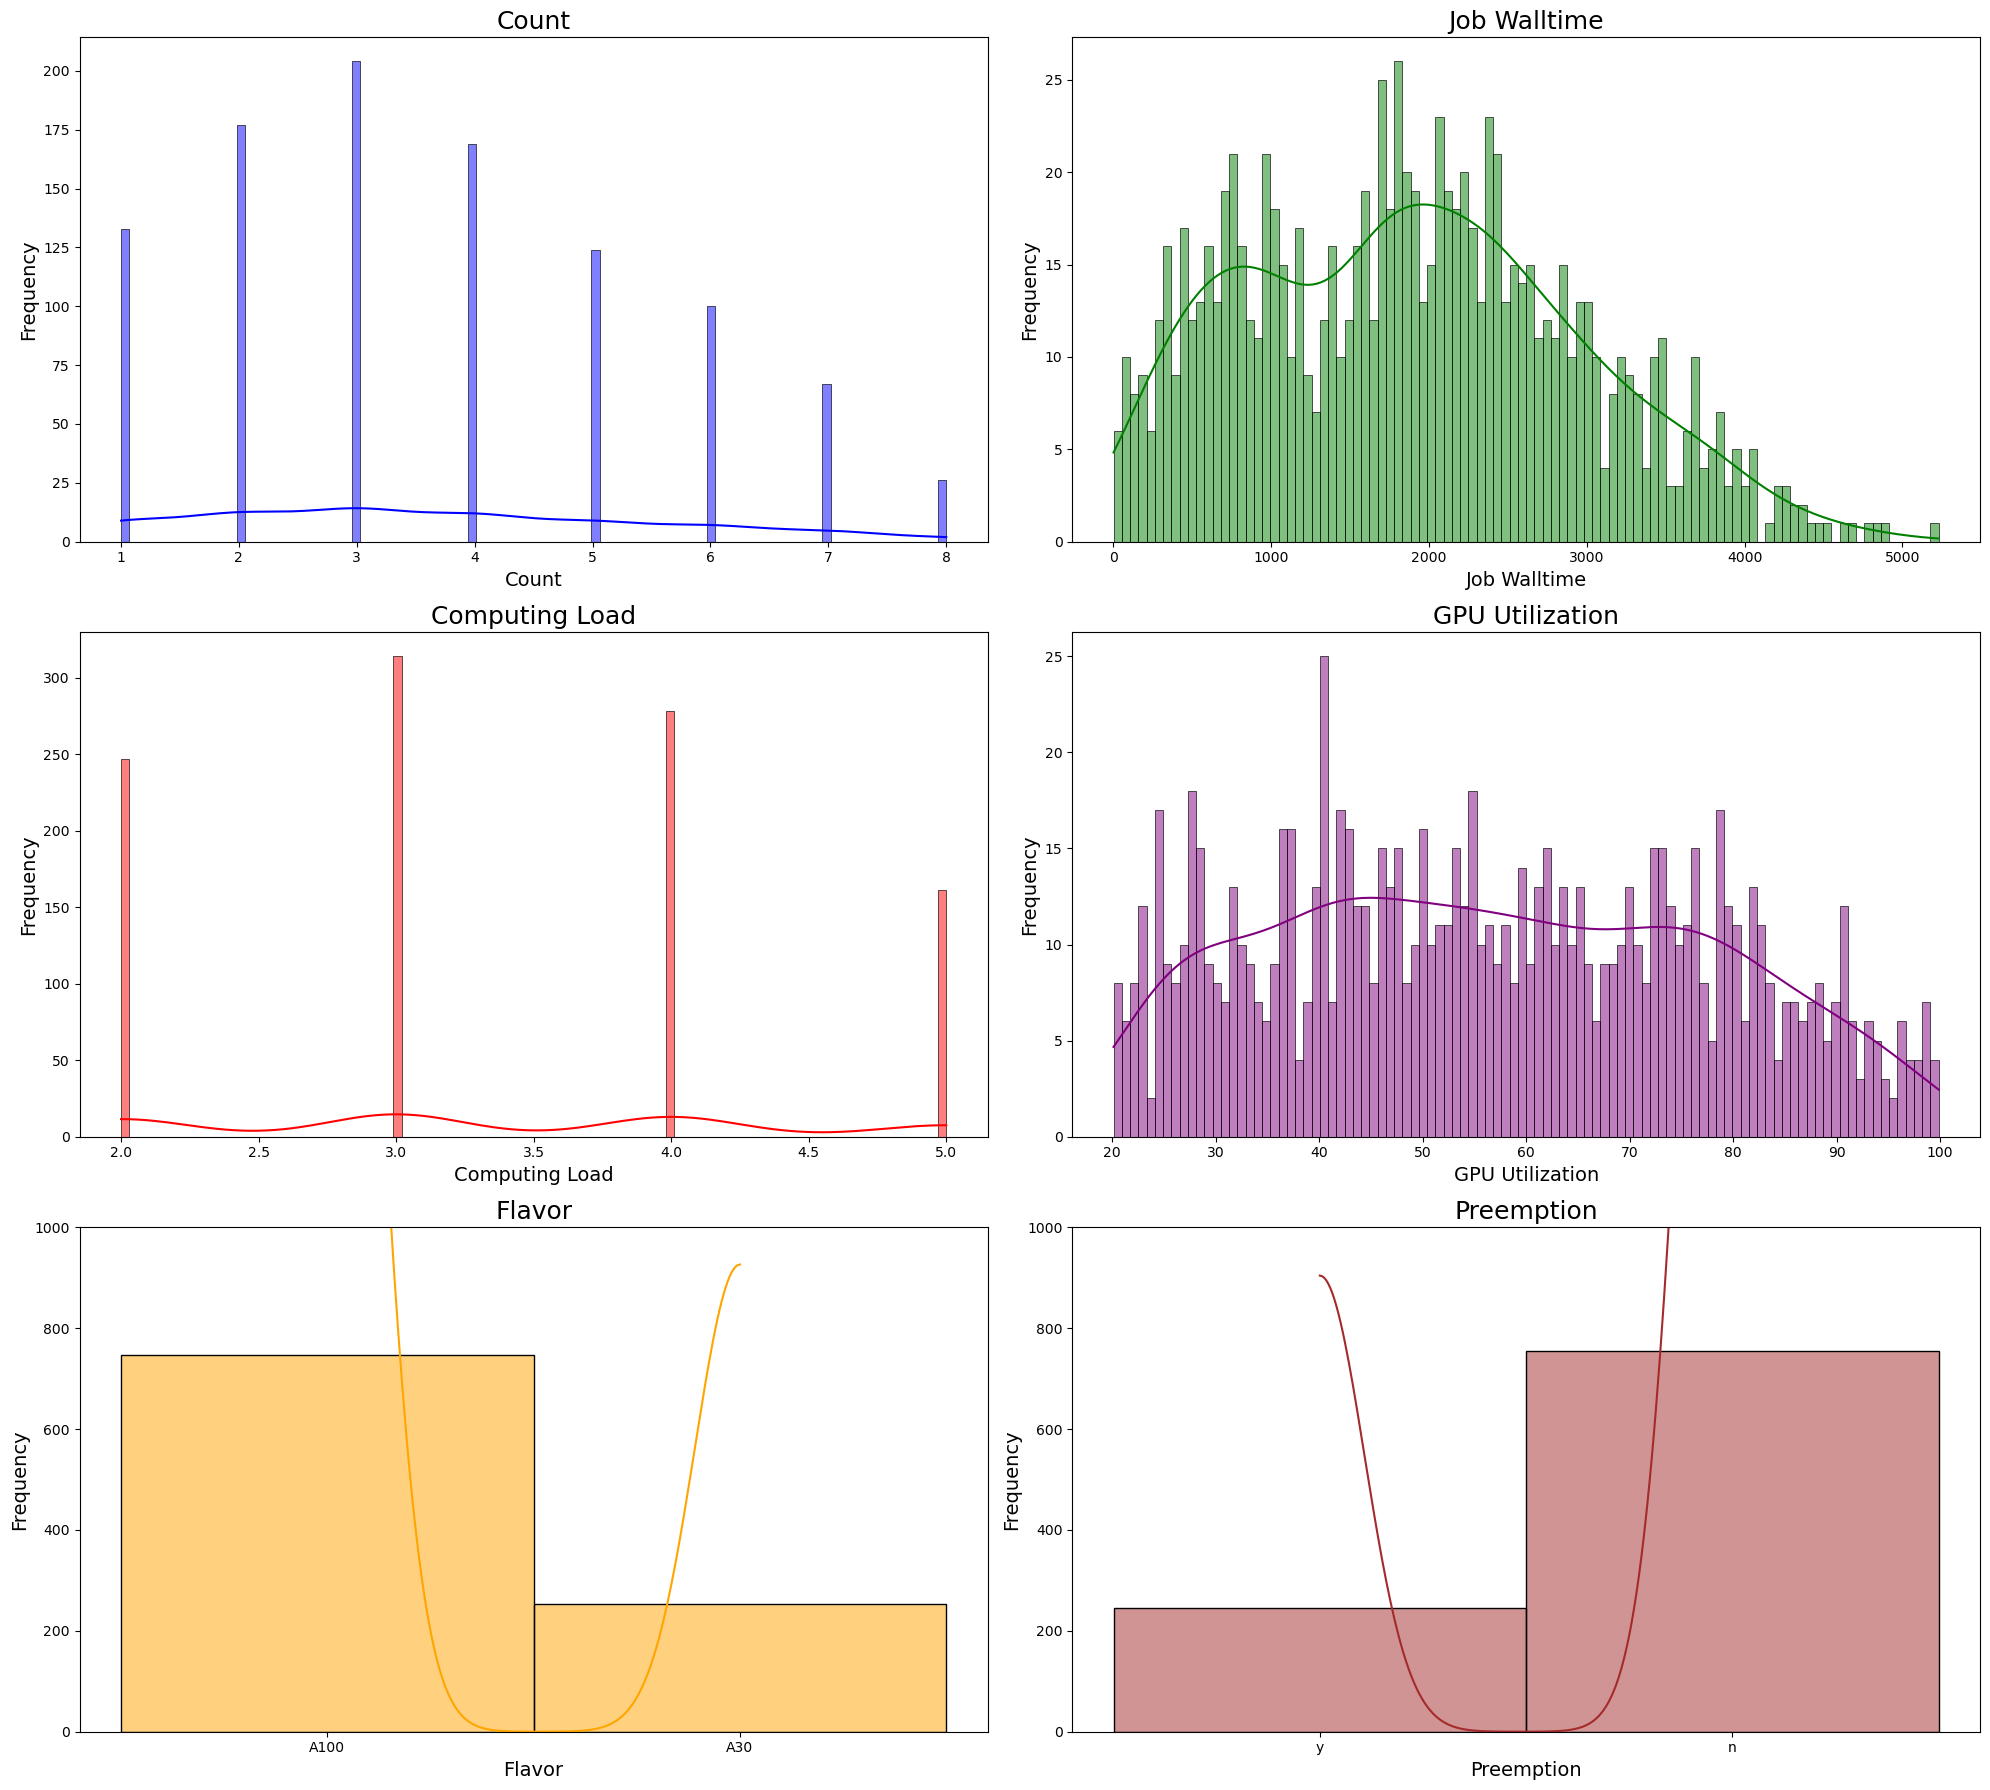

In [9]:
plot_histograms_(get_latest_csv_data('.'), 100)

In [62]:
folder_path = '.'  # Replace with your folder path
df = get_latest_csv_data(folder_path)
df

File: 20240612_151847.csv


,pod_name,pod_type,project,namespace,user_team,start,finish,count,time_diff,computing_load,gpu_utilization,flavor,preemption
0,run-pipeline-gpu-i0mdj-338,task,PROJECT_19,ns-18749,TEAM_7,2024-07-01 04:33:45+00:00,2024-07-02 01:02:45+00:00,8,1229,4,69.2572,A100,n
1,run-pipeline-gpu-4qrq7-7781,task,PROJECT_18,ns-29200,TEAM_6,2024-06-29 23:33:45+00:00,2024-06-30 01:48:45+00:00,5,135,2,20.8572,A100,n
2,run-pipeline-gpu-egvwv-5450,task,PROJECT_17,ns-23101,TEAM_9,2024-06-19 16:29:45+00:00,2024-06-23 00:16:45+00:00,7,4787,3,56.8162,A30,y
3,run-pipeline-gpu-3w6pg-19540,task,PROJECT_15,ns-96,TEAM_1,2024-06-27 12:55:45+00:00,2024-06-28 13:29:45+00:00,7,1474,2,29.0747,A100,n
4,run-pipeline-gpu-kzzf7-10509,task,PROJECT_20,ns-22898,TEAM_4,2024-06-27 14:00:45+00:00,2024-06-28 02:54:45+00:00,5,774,4,64.8745,A100,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,run-pipeline-gpu-be17v-32153,task,PROJECT_15,ns-31106,TEAM_8,2024-06-27 05:06:45+00:00,2024-06-27 12:46:45+00:00,8,460,3,41.4226,A30,n
49996,run-pipeline-gpu-dt4dk-6490,task,PROJECT_7,ns-24255,TEAM_8,2024-06-29 11:55:45+00:00,2024-06-29 22:28:45+00:00,6,633,5,83.6549,A100,n
49997,run-pipeline-gpu-ov8ng-22962,instance,PROJECT_9,ns-30269,TEAM_6,2024-06-15 12:35:45+00:00,2024-06-17 08:56:45+00:00,8,2661,4,67.2852,A100,n
49998,run-pipeline-gpu-28y8z-15111,task,PROJECT_16,ns-6502,TEAM_1,2024-06-27 22:56:45+00:00,2024-06-28 10:47:45+00:00,6,711,2,21.9139,A100,n


In [42]:
df.describe()

,count,time_diff,computing_load,gpu_utilization
count,50000.00000,50000.000000,50000.000000,50000.000000
mean,2.44508,1.536380,4.036920,66.041275
std,1.71553,1.974455,0.189203,5.991415
min,1.00000,0.000000,4.000000,60.000100
25%,1.00000,0.000000,4.000000,61.760550
50%,2.00000,1.000000,4.000000,64.194750
75%,3.00000,2.000000,4.000000,68.384050
max,8.00000,21.000000,7.000000,125.740000


In [75]:
def plot_3d(data):
    # x, y, z 값 설정
    x = data['time_diff']
    y = data['count']
    z = data['gpu_utilization']
    
    # 그리드 데이터 생성
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')
    
    # 3D 플롯 설정
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 3D surface plot 생성
    surf = ax.plot_surface(xi, yi, zi, cmap='viridis')
    
    # 컬러 바 추가
    fig.colorbar(surf)
    
    # 레이블 설정
    ax.set_xlabel('Time Difference')
    ax.set_ylabel('Count')
    ax.set_zlabel('GPU Utilization')
    
    # 제목 설정
    ax.set_title('3D Surface Plot of time_diff, count, and gpu_utilization')
    
    # 그래프 표시
    plt.show()

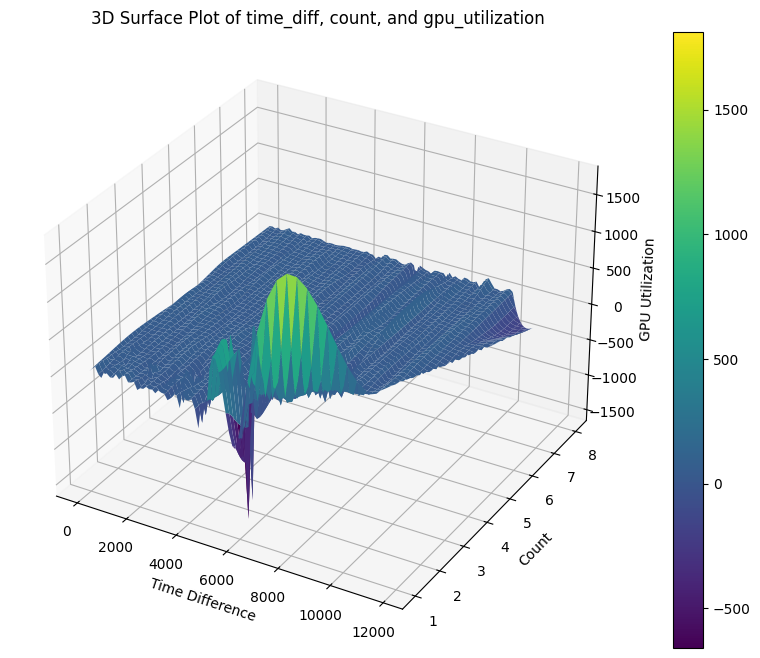

In [76]:
plot_3d(df)

In [13]:
def plot_histograms(df, bin_count):
    fig, axs = plt.subplots(3, 2, figsize=(73, 60))
    
    # Plot histograms with KDE
    sns.histplot(df['count'], bins=bin_count, kde=True, ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Count')
    
    sns.histplot(df['time_diff'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Job Walltime')
    
    sns.histplot(df['computing_load'], bins=bin_count, kde=True, ax=axs[1, 0], color='red')
    axs[1, 0].set_title('Computing Load')
    
    sns.histplot(df['gpu_utilization'], bins=bin_count, kde=True, ax=axs[1, 1], color='purple')
    axs[1, 1].set_title('GPU Utilization')

    sns.histplot(df['flavor'], bins=bin_count, kde=True, ax=axs[2, 0], color='orange')
    axs[2, 0].set_title('Flavor')
    
    sns.histplot(df['preemption'], bins=bin_count, kde=True, ax=axs[2, 1], color='brown')
    axs[2, 1].set_title('Preemption')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show plot
    plt.show()

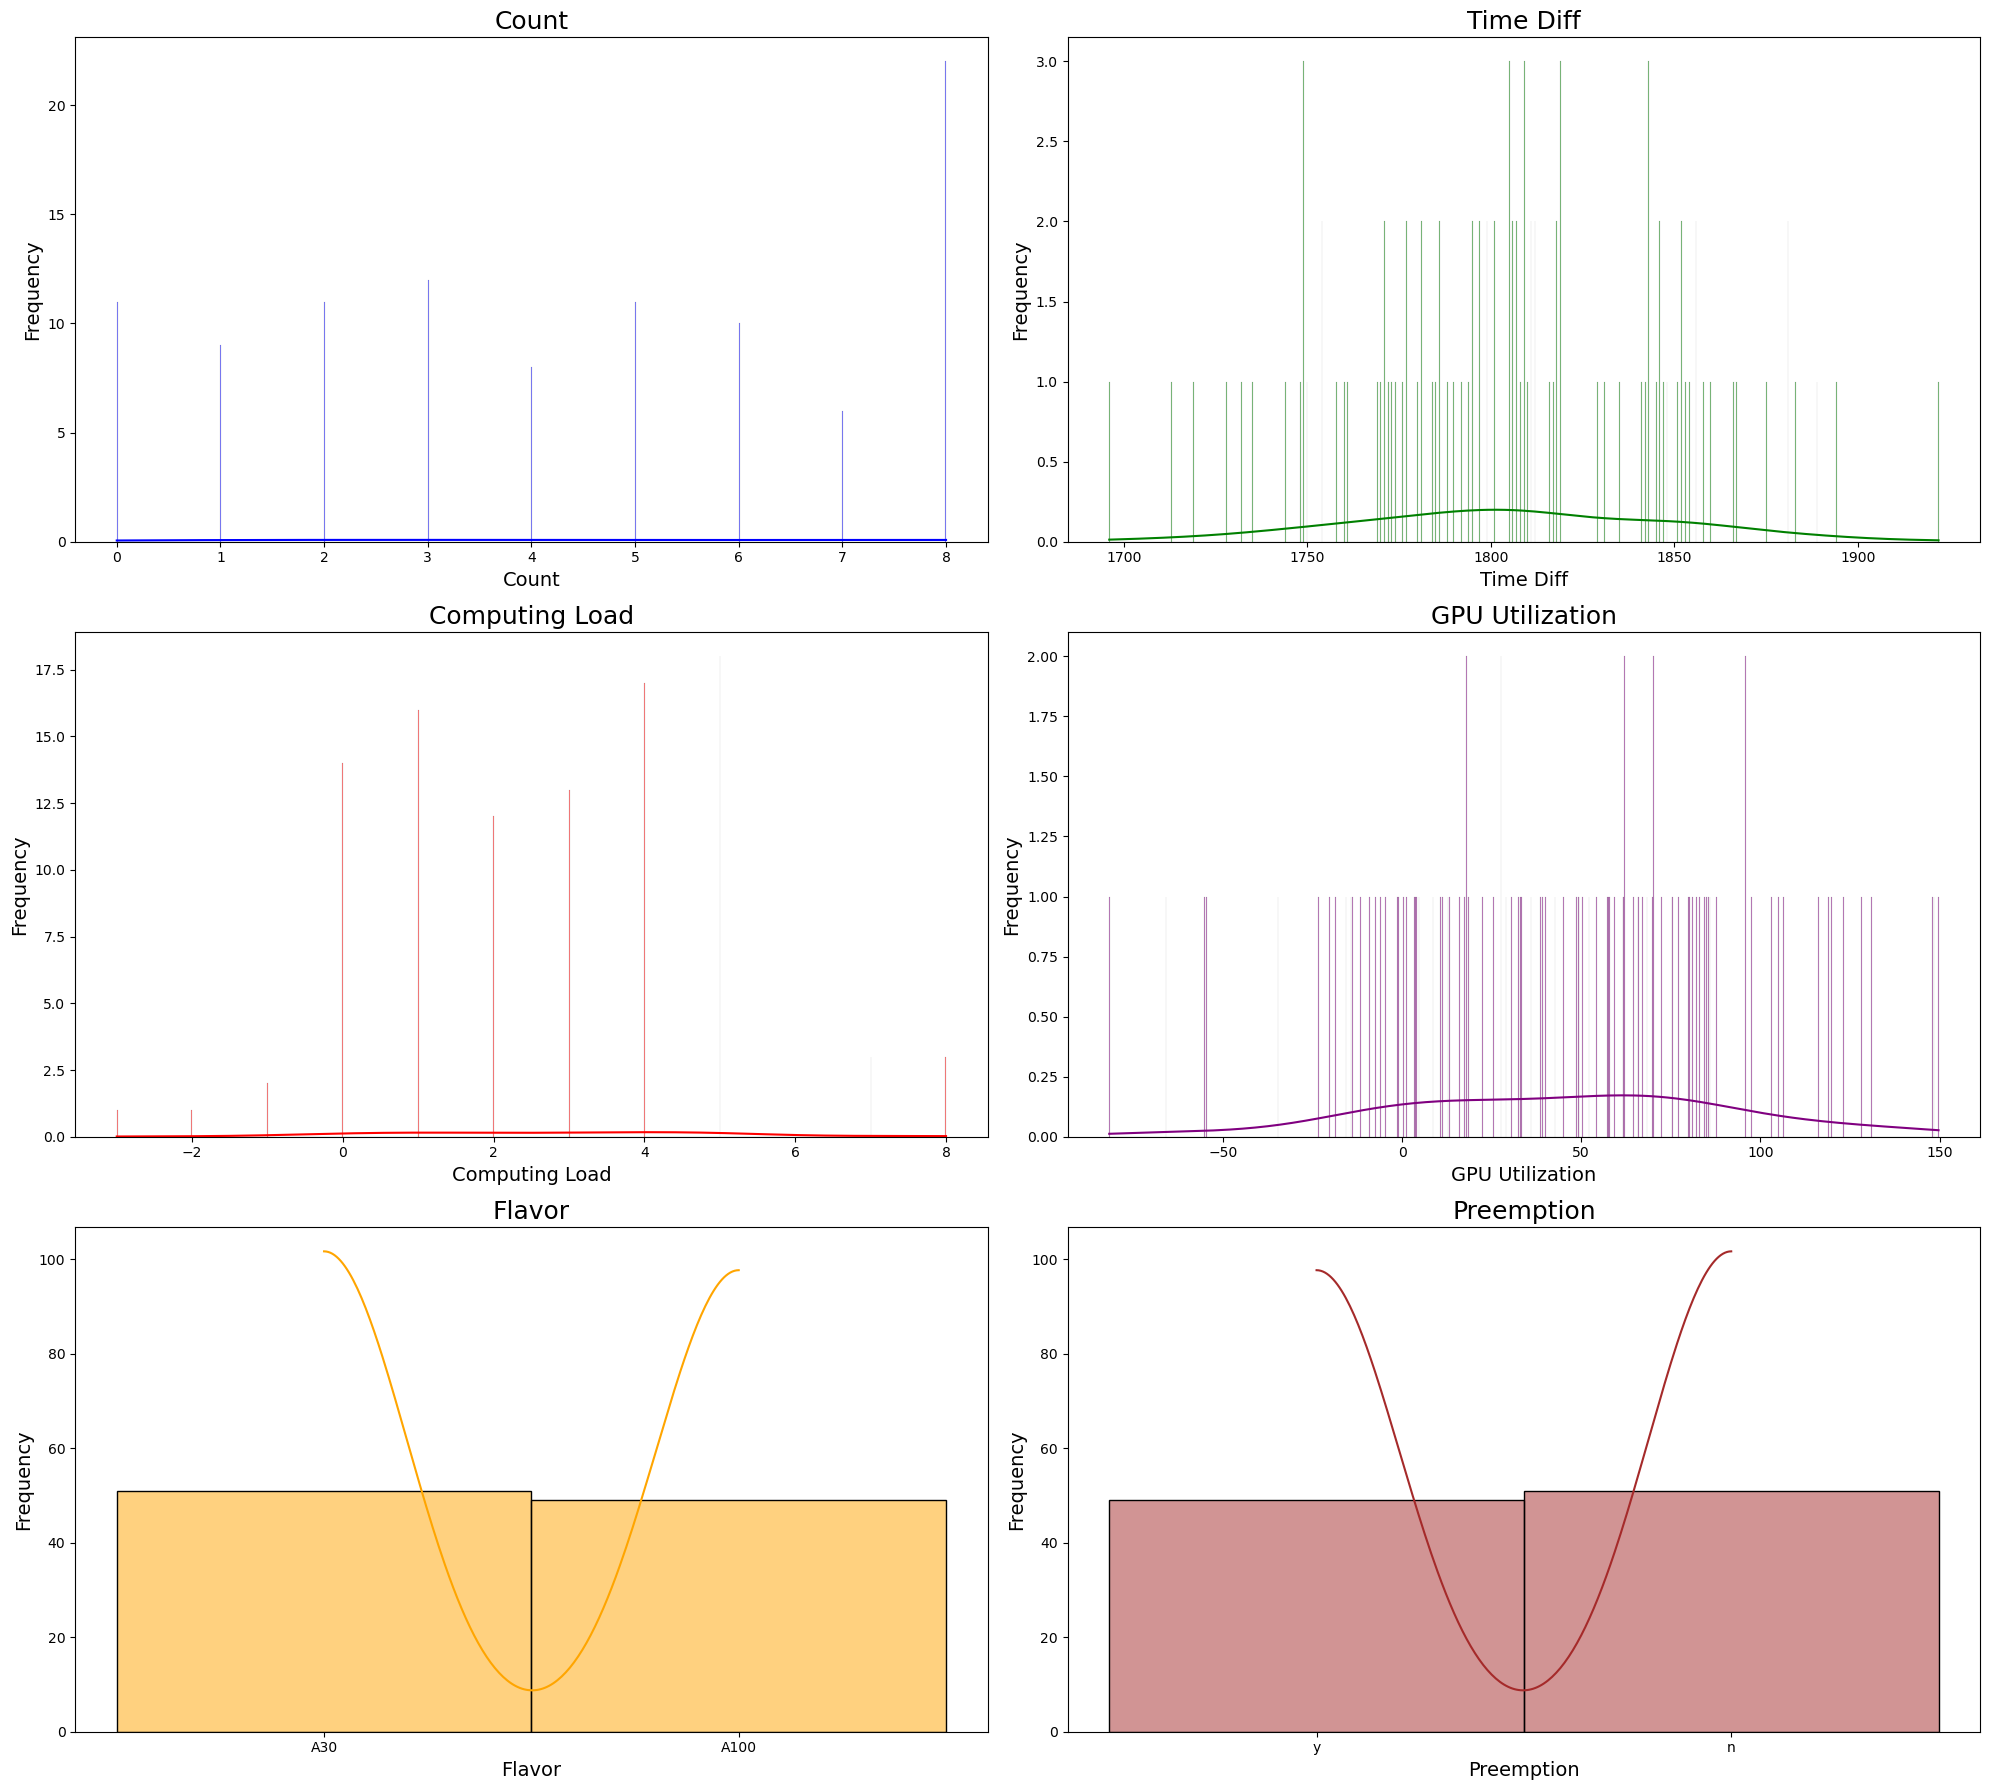

In [9]:
plot_histograms_(df, 1000)